In [3]:
# Import libraries
from pandas import read_csv
from matplotlib import pyplot
from numpy import sqrt
import warnings
warnings.filterwarnings('ignore')
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [4]:
series = read_csv('C:\\Users\\Swetha\\Documents\\EXCELR\\DS - PROJECT DETAILS\\Gold_data.csv', header=0, index_col=0, parse_dates=True)

In [5]:
series.head()

,price
date,
2016-01-01,2252.60
2016-01-02,2454.50
2016-01-03,2708.10
2016-01-04,2577.80
2016-01-05,2597.75


In [6]:
# Resetting index 
series1 = series.reset_index()
series1.head()

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75


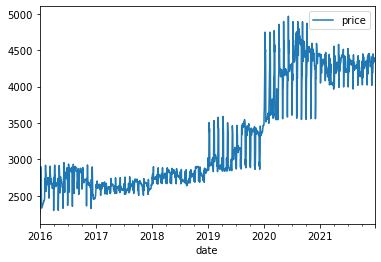

In [7]:
# line plot of time series
from pandas import read_csv
from matplotlib import pyplot
series.plot()
pyplot.show()

In [9]:
# separate out a validation dataset (90%-training data and 10% test data)
split_point = len(series) - 218
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 1964, Validation 218


Persistence/ Base model

In [10]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.80)
train, test = X[0:train_size], X[train_size:]

In [11]:
X

array([2252.6, 2454.5, 2708.1, ..., 4336.7, 4336.7, 4387.9], dtype=float32)

In [12]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.1f, Observed =%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=4135.6, Observed =4175.300
>Predicted=4175.3, Observed =4160.100
>Predicted=4160.1, Observed =4211.300
>Predicted=4211.3, Observed =4229.700
>Predicted=4229.7, Observed =4237.000
>Predicted=4237.0, Observed =4230.500
>Predicted=4230.5, Observed =4229.400
>Predicted=4229.4, Observed =4193.500
>Predicted=4193.5, Observed =4175.600
>Predicted=4175.6, Observed =4146.500
>Predicted=4146.5, Observed =4082.600
>Predicted=4082.6, Observed =3573.500
>Predicted=3573.5, Observed =3559.000
>Predicted=3559.0, Observed =3962.800
>Predicted=3962.8, Observed =3974.000
>Predicted=3974.0, Observed =4154.100
>Predicted=4154.1, Observed =4080.300
>Predicted=4080.3, Observed =4254.400
>Predicted=4254.4, Observed =4895.800
>Predicted=4895.8, Observed =4544.800
>Predicted=4544.8, Observed =4485.700
>Predicted=4485.7, Observed =4631.000
>Predicted=4631.0, Observed =4353.600
>Predicted=4353.6, Observed =4153.400
>Predicted=4153.4, Observed =4190.800
>Predicted=4190.8, Observed =4244.300
>Predicted=4

ARIMA Hyperparameters

In [13]:
# grid search ARIMA parameters for a time series
import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.90)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse


Grid search for p,d,q values

In [14]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except Exception as e :
                    print(e)
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

# DO NOT RUN THE CELL (LOAD DATASET)

In [14]:
# load dataset
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
p_values = range(0,5)
d_values = range(0,5)
q_values = range(0,5)
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=1162.386
ARIMA(0, 0, 1) RMSE=628.211
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
ARIMA(0, 1, 0) RMSE=122.092
ARIMA(0, 1, 1) RMSE=122.180
ARIMA(0, 1, 2) RMSE=117.887
ARIMA(0, 1, 3) RMSE=118.144
ARIMA(0, 1, 4) RMSE=113.451
ARIMA(0, 2, 0) RMSE=186.959
ARIMA(0, 2, 1) RMSE=122.190
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different

Build Model based on the optimized values

In [15]:
# save finalized model to file
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy
import warnings
warnings.filterwarnings('ignore')

In [16]:
# load data
train = read_csv('dataset.csv', index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

In [17]:
train

,2252.6
2016-01-01,
2016-01-02,2454.50
2016-01-03,2708.10
2016-01-04,2577.80
2016-01-05,2597.75
2016-01-06,2617.70
...,...
2021-05-13,4308.50
2021-05-14,4333.10
2021-05-15,4336.70


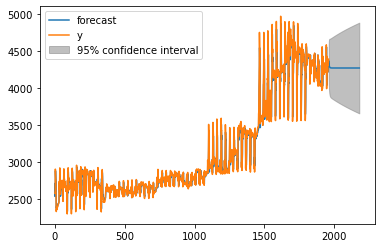

In [21]:
# fit model
model = ARIMA(X, order=(2,0,3))
model_fit = model.fit()
forecast=model_fit.forecast(steps=218)[0]
model_fit.plot_predict(2, 2182)
plt.show()

In [22]:
#Error on the test data
val=pd.read_csv('validation.csv',header=None)
rmse = sqrt(mean_squared_error(val[1], forecast))
rmse

98.90046671682417

In [31]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE = mean_absolute_percentage_error(val[1], forecast)
MAPE

0.01836932689761131

EVALUATION METRICS TO MEASURE THE PERFORMANCE:

provide a summary of the forecast model’s skill and capability in making the forecasts

1) R-Squared: A high R2 indicates that the observed and anticipated values have a strong association.

2) Mean Absolute Error: - defined as the average of the absolute difference between forecasted and true values. - The lower the MAE value, the better the model; a value of zero indicates that the forecast is error-free.

3) Mean Absolute Percentage Error: - the proportion of the average absolute difference between projected and true values divided by the true value - The model is better if the MAPE is low. Remember that MAPE works best with data that is devoid of zeros and extreme values.

4) Mean Squared Error: - defined as the average of the error squares. - The closer MSE is to zero, the better.

5) Root Mean Squared Error: - defined as the square root of mean square error and is an extension of MSE. - This statistic is likewise always positive, with lower values indicating higher performance.

6) Normalized Root Mean Squared Error: - The smaller the value, the better the model’s performance.

7) Weighted Absolute Percentage Error: - It is a MAPE version in which errors are weighted by real values - The higher the model’s performance, the lower the WMAPE number. - When evaluating forecasting models, this metric is useful for low volume data where each observation has a varied priority.

8) Weighted Mean Absolute Percentage Error

SUMMARY:

- When the relation between the forecasted and actual value is to be known then R2 is used

- MAPE is simple to understand and is used to compare different forecast models or datasets because it is a percentage value.

- RMSE is easier to interpret because the RMSE number is on the same scale as the projected values.

In [7]:
# import pandas as pd
import pandas as pd
  
# list of strings
lst = ['ARIMA', 'SES', 'Holt method', 'Holts winter with additive seasonality & trend', 
            'Holts winter with seasonality(MUL) & trend(ADD)']
  
# list of int
lst2 = [99,244,15120,584,698] ##### RMSE

lst3 = [0,4,114,12,15] ############# MAPE
  
# Calling DataFrame constructor after zipping
# both lists, with columns specified
df = pd.DataFrame(list(zip(lst, lst2, lst3)),
               columns =['Model Name', 'RMSE', 'MAPE'])
df

,Model Name,RMSE,MAPE
0,ARIMA,99,0
1,SES,244,4
2,Holt method,15120,114
3,Holts winter with additive seasonality & trend,584,12
4,Holts winter with seasonality(MUL) & trend(ADD),698,15


In [24]:
val

,0,1
0,2021-05-18,4386.1
1,2021-05-19,4397.9
2,2021-05-20,4400.6
3,2021-05-21,4399.4
4,2021-05-22,4401.8
...,...,...
213,2021-12-17,4394.4
214,2021-12-18,4389.5
215,2021-12-19,4389.5
216,2021-12-20,4354.1


Combine train and test data and build final model

In [25]:
# fit model
data = read_csv('C:\\Users\\Swetha\\Documents\\EXCELR\\DS - PROJECT DETAILS\\Gold_data.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = data.values
X = X.astype('float32')

In [26]:
model_arima = ARIMA(X, order=(2, 0, 3)).fit()

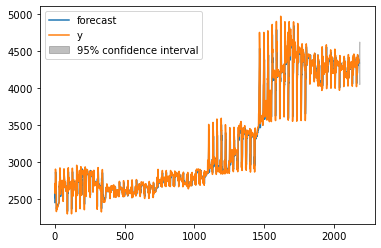

In [30]:
forecast=model_arima.forecast(steps=218)[0]
model_arima.plot_predict(2,2183)
plt.show()

In [27]:
final_forecast=model_arima.forecast(steps=30)[0]
final_forecast

array([4341.53216672, 4335.89632254, 4332.00146023, 4329.12931266,
       4327.0112991 , 4325.44937232, 4324.29749533, 4323.44798272,
       4322.82142892, 4322.35928151, 4322.01836482, 4321.76684179,
       4321.58123628, 4321.44423731, 4321.34308006, 4321.26835193,
       4321.21311224, 4321.17224302, 4321.14197036, 4321.11951144,
       4321.10281425, 4321.09036567, 4321.08104996, 4321.07404436,
       4321.06874222, 4321.06469617, 4321.06157635, 4321.05913951,
       4321.0572063 , 4321.05564445])

In [28]:
pred =  pd.DataFrame(final_forecast)
pred

,0
0,4341.532167
1,4335.896323
2,4332.001460
3,4329.129313
4,4327.011299
5,4325.449372
6,4324.297495
7,4323.447983
8,4322.821429
9,4322.359282


In [32]:
index_future_dates=pd.date_range(start='2021-12-22',end='2022-01-20')

In [33]:
pred.index=index_future_dates.rename("date")

In [34]:
pred.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 2021-12-22 to 2022-01-20
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       30 non-null     float64
dtypes: float64(1)
memory usage: 480.0 bytes


In [35]:
pred.columns=['Price']
pred

,Price
date,
2021-12-22,4341.532167
2021-12-23,4335.896323
2021-12-24,4332.001460
2021-12-25,4329.129313
2021-12-26,4327.011299
2021-12-27,4325.449372
2021-12-28,4324.297495
2021-12-29,4323.447983
2021-12-30,4322.821429


In [36]:
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA
from pickle import dump
from pickle import load

In [38]:
data = read_csv('C:\\Users\\Swetha\\Documents\\EXCELR\\DS - PROJECT DETAILS\\Gold_data.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = data.values
X = X.astype('float32')

In [39]:
model_arima = ARIMA(X, order=(2, 0, 3)).fit()

In [40]:
final_forecast=model_arima.forecast(steps=30)[0]
final_forecast

array([4341.53216672, 4335.89632254, 4332.00146023, 4329.12931266,
       4327.0112991 , 4325.44937232, 4324.29749533, 4323.44798272,
       4322.82142892, 4322.35928151, 4322.01836482, 4321.76684179,
       4321.58123628, 4321.44423731, 4321.34308006, 4321.26835193,
       4321.21311224, 4321.17224302, 4321.14197036, 4321.11951144,
       4321.10281425, 4321.09036567, 4321.08104996, 4321.07404436,
       4321.06874222, 4321.06469617, 4321.06157635, 4321.05913951,
       4321.0572063 , 4321.05564445])

In [45]:
pred =  pd.DataFrame(final_forecast)
pred

,0
0,4341.532167
1,4335.896323
2,4332.001460
3,4329.129313
4,4327.011299
5,4325.449372
6,4324.297495
7,4323.447983
8,4322.821429
9,4322.359282


In [46]:
index_future_dates=pd.date_range(start='2021-12-22',end='2022-01-20')

In [47]:
pred.index=index_future_dates.rename("date")

In [48]:
pred.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 2021-12-22 to 2022-01-20
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       30 non-null     float64
dtypes: float64(1)
memory usage: 480.0 bytes


In [50]:
pred.columns=['Price']
pred

,Price
date,
2021-12-22,4341.532167
2021-12-23,4335.896323
2021-12-24,4332.001460
2021-12-25,4329.129313
2021-12-26,4327.011299
2021-12-27,4325.449372
2021-12-28,4324.297495
2021-12-29,4323.447983
2021-12-30,4322.821429


In [56]:
# save the model to disk
dump(model_arima, open('gold_prediction_ARIMA_model.sav', 'wb'))

# load the model from disk
loaded_model = load(open('gold_prediction_ARIMA_model.sav', 'rb'))
result = pd.DataFrame(loaded_model.forecast(steps=30)[0])
print(result)

              0
0   4341.532167
1   4335.896323
2   4332.001460
3   4329.129313
4   4327.011299
5   4325.449372
6   4324.297495
7   4323.447983
8   4322.821429
9   4322.359282
10  4322.018365
11  4321.766842
12  4321.581236
13  4321.444237
14  4321.343080
15  4321.268352
16  4321.213112
17  4321.172243
18  4321.141970
19  4321.119511
20  4321.102814
21  4321.090366
22  4321.081050
23  4321.074044
24  4321.068742
25  4321.064696
26  4321.061576
27  4321.059140
28  4321.057206
29  4321.055644
